# Air Quality Analítica de datos
**Daniel Enrique Patiño Jaimes**

In [18]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lectura del documento

In [20]:
data = pd.read_csv('AirQualityUCI.csv',sep = ';')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/04/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/04/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/04/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/04/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Se elimina la columna 'NMHC(GT)' debido a que los datos que contiene resultan incoherentes y entorpecen el respectivo análisis

In [21]:
data = data.drop(columns = ['NMHC(GT)'])
data

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/04/2005,10.00.00,3.1,1314,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/04/2005,11.00.00,2.4,1163,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/04/2005,12.00.00,2.4,1142,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/04/2005,13.00.00,2.1,1003,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Se seleccionan los nombres de las columnas que se pueden graficar y manipular

In [22]:
columns_names = data.columns.values
print(columns_names[2:])

['CO(GT)' 'PT08.S1(CO)' 'C6H6(GT)' 'PT08.S2(NMHC)' 'NOx(GT)'
 'PT08.S3(NOx)' 'NO2(GT)' 'PT08.S4(NO2)' 'PT08.S5(O3)' 'T' 'RH' 'AH']


## Eliminación de atípicos

Graficas de cajas y bigotes para identificación de atípicos

CO(GT)              AxesSubplot(0.125,0.657941;0.168478x0.222059)
PT08.S1(CO)      AxesSubplot(0.327174,0.657941;0.168478x0.222059)
C6H6(GT)         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
PT08.S2(NMHC)    AxesSubplot(0.731522,0.657941;0.168478x0.222059)
NOx(GT)             AxesSubplot(0.125,0.391471;0.168478x0.222059)
PT08.S3(NOx)     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
NO2(GT)          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
PT08.S4(NO2)     AxesSubplot(0.731522,0.391471;0.168478x0.222059)
PT08.S5(O3)            AxesSubplot(0.125,0.125;0.168478x0.222059)
T                   AxesSubplot(0.327174,0.125;0.168478x0.222059)
RH                  AxesSubplot(0.529348,0.125;0.168478x0.222059)
AH                  AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

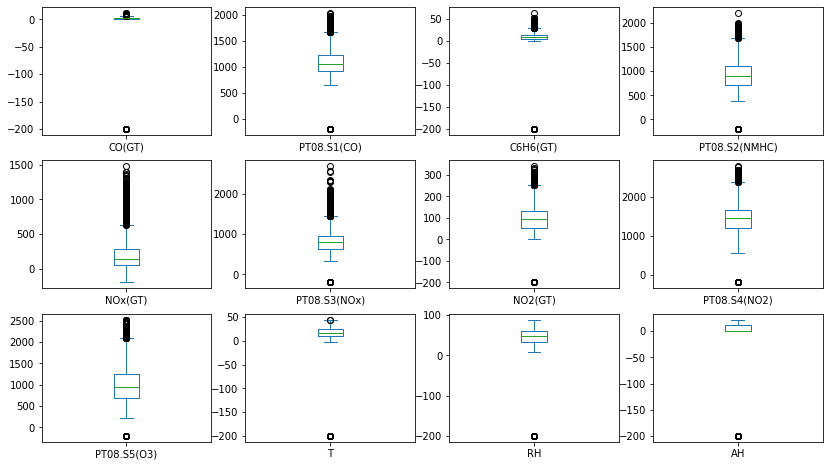

In [23]:
boxplots_cols = columns_names[2:]
data[boxplots_cols].plot(kind='box',subplots=True,layout=(3,4),figsize=(14,8))

Se crea un dataframe para almacenar la ubicación de los datos atípicos de cada columna


*   La fila 0 son los atípicos que están por encima del límite superior
*   La fila 1 son los atípicos que están por debajo del límite inferior

In [24]:
df = pd.DataFrame()
for i in columns_names[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.5 * IQR
  l_limit_h = Q1 - 1.5 * IQR
  upper = np.where(data[i]>u_limit_h) # Atípicos ubicados encima del límite superior
  lower = np.where(data[i]<l_limit_h) # Atípicos ubicados debajo del límite inferior
  atp = upper + lower
  df[i]=atp
  
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"[25, 26, 50, 98, 111, 112, 120, 121, 122, 159,...","[25, 50, 53, 97, 98, 110, 111, 112, 120, 121, ...","[50, 111, 120, 121, 122, 159, 169, 170, 183, 2...","[111, 121, 169, 998, 1502, 1646, 1670, 1839, 2...","[4490, 4491, 4549, 4647, 4657, 4669, 4670, 467...","[6, 7, 8, 9, 10, 11, 12, 13, 29, 33, 34, 35, 3...","[6047, 6049, 6050, 6051, 6064, 6065, 6264, 667...","[50, 111, 120, 121, 122, 159, 169, 170, 183, 2...","[111, 121, 169, 170, 1167, 2031, 2174, 2832, 3...","[3213, 3214]",[],[]
1,"[10, 34, 39, 58, 82, 106, 130, 154, 178, 202, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...",[],"[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[9, 33, 39, 57, 81, 105, 129, 153, 177, 201, 2...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ...","[524, 525, 526, 701, 702, 703, 704, 705, 706, ..."


Se vuelven NaN los valores atípicos para aplicarles interpolación

In [25]:
for i in columns_names[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.5 * IQR
  l_limit_h = Q1 - 1.5 * IQR
  data.loc[data[i] < l_limit_h,i]=np.nan
  data.loc[data[i] > u_limit_h,i]=np.nan

new_dataset = data.interpolate()

Se crea un nuevo dataset con los valores interpolados y se eliminan los valores que no se pudieron interpolar, es decir los valores que quedaron NaN

In [26]:
for i in columns_names[2:]:
  new_dataset = new_dataset[new_dataset[i].notna()]

new_dataset

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Gráfica de cajas y bigotes para comprobar si hubo reducción en la cantidad de atípicos

CO(GT)              AxesSubplot(0.125,0.657941;0.133621x0.222059)
PT08.S1(CO)      AxesSubplot(0.285345,0.657941;0.133621x0.222059)
C6H6(GT)          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
PT08.S2(NMHC)    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
NOx(GT)          AxesSubplot(0.766379,0.657941;0.133621x0.222059)
PT08.S3(NOx)        AxesSubplot(0.125,0.391471;0.133621x0.222059)
NO2(GT)          AxesSubplot(0.285345,0.391471;0.133621x0.222059)
PT08.S4(NO2)      AxesSubplot(0.44569,0.391471;0.133621x0.222059)
PT08.S5(O3)      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
T                AxesSubplot(0.766379,0.391471;0.133621x0.222059)
RH                     AxesSubplot(0.125,0.125;0.133621x0.222059)
AH                  AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

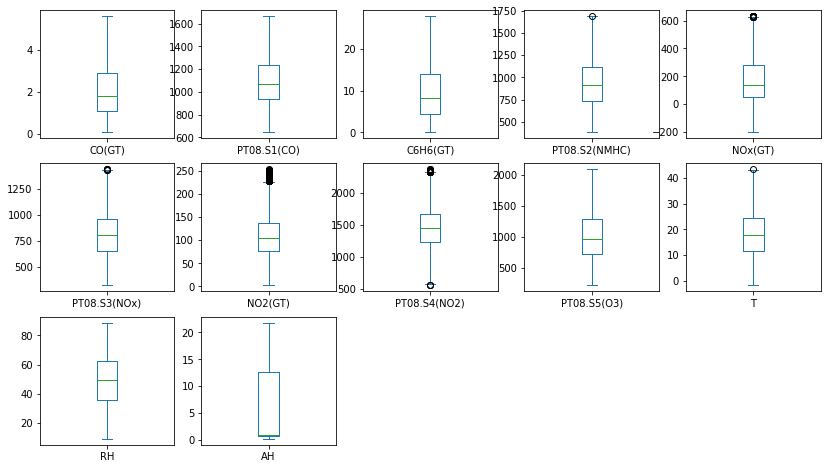

In [27]:
boxplots_cols = columns_names[2:]
new_dataset[boxplots_cols].plot(kind='box',subplots=True,layout=(3,5),figsize=(14,8))

## Modelos 

### Modelo a. PT08.S2

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print(columns_names[5])
print('Caracteristicas: ',columns_names[3],columns_names[4],columns_names[10])

df_caracteristica = new_dataset[[columns_names[3],columns_names[4],columns_names[10]]]
df_resultado = new_dataset[columns_names[5]]

x_train,x_test,y_train,y_test = train_test_split(df_caracteristica,df_resultado, train_size= 0.7)
modelo=LinearRegression()
modelo.fit(X=np.array(x_train), y=y_train)
predicciones = modelo.predict(X = np.array(x_test))
r2_a = r2_score(y_true = y_test, y_pred = predicciones)
print('El r2 es ',r2_a)

PT08.S2(NMHC)
Caracteristicas:  PT08.S1(CO) C6H6(GT) PT08.S5(O3)
El r2 es  0.9624280398598299


### Modelo b. PT08.S1

In [29]:
df_caracteristica = new_dataset[[columns_names[4],columns_names[5],columns_names[7],columns_names[10]]]
df_resultado = new_dataset[columns_names[3]]
print(columns_names[3])
print('Caracteristicas: ',columns_names[4],columns_names[5],columns_names[7],columns_names[10])


x_train,x_test,y_train,y_test = train_test_split(df_caracteristica,df_resultado, train_size= 0.7)
modelo=LinearRegression()
modelo.fit(X=np.array(x_train), y=y_train)
predicciones = modelo.predict(X = np.array(x_test))
r2_b = r2_score(y_true = y_test, y_pred = predicciones)
print('El r2 es ',r2_b)

PT08.S1(CO)
Caracteristicas:  C6H6(GT) PT08.S2(NMHC) PT08.S3(NOx) PT08.S5(O3)
El r2 es  0.8505353310574106


### Modelo c. PT08.S5

In [30]:
df_caracteristica = new_dataset[[columns_names[3],columns_names[5],columns_names[6],columns_names[7],columns_names[9],columns_names[11],columns_names[12],columns_names[13]]]
df_resultado = new_dataset[columns_names[10]]

print(columns_names[10])
print('Caracteristicas: ',columns_names[3],columns_names[5],columns_names[6],columns_names[7],columns_names[9],columns_names[11],columns_names[12],columns_names[13])
x_train,x_test,y_train,y_test = train_test_split(df_caracteristica,df_resultado, train_size= 0.7)
modelo=LinearRegression()
modelo.fit(X=np.array(x_train), y=y_train)
predicciones = modelo.predict(X = np.array(x_test))
r2_c = r2_score(y_true = y_test, y_pred = predicciones)
print('El r2 es ',r2_c)

PT08.S5(O3)
Caracteristicas:  PT08.S1(CO) PT08.S2(NMHC) NOx(GT) PT08.S3(NOx) PT08.S4(NO2) T RH AH
El r2 es  0.8784944243007372


# Comparación de desempeños

Se evidencia que el desempeño del modelo A (PT08.S2) es mayor que los modelos B (PT08.S1) y C (PT08.S5) esto se debe a que las características utilizadas para entrenar el modelo A resultan menos dispersas a comparación de las características empleadas para los modelos B y C, cabe aclarar que para cada modelo se buscó usar las características que presentaran una menor dispersión

In [38]:
print("Desempeño modelo A: ",r2_a)
print("Desempeño modelo B: ",r2_b)
print("Desempeño modelo C: ",r2_c)

Desempeño modelo A:  0.9624280398598299
Desempeño modelo B:  0.8505353310574106
Desempeño modelo C:  0.8784944243007372


# Reporte de gráficas

### Matriz de correlación

In [ ]:
corr = data.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

## Gráficas de dispersión

### Dispersión para modelo A

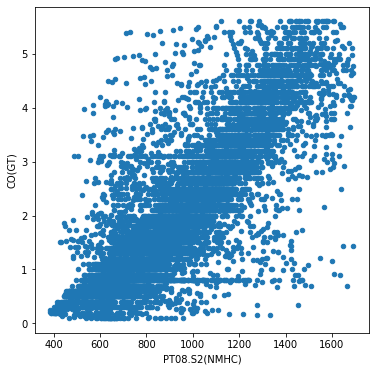

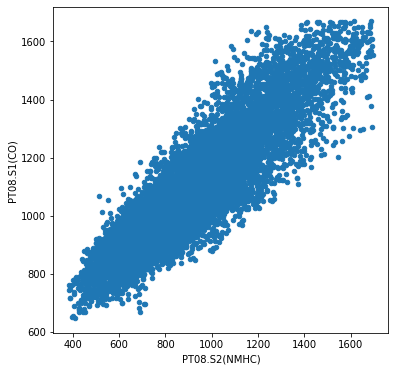

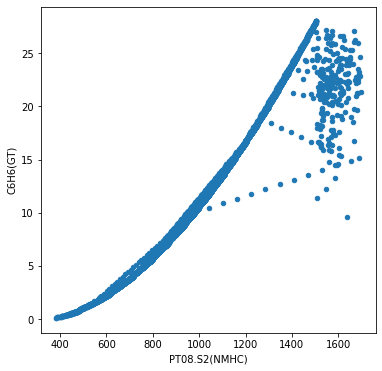

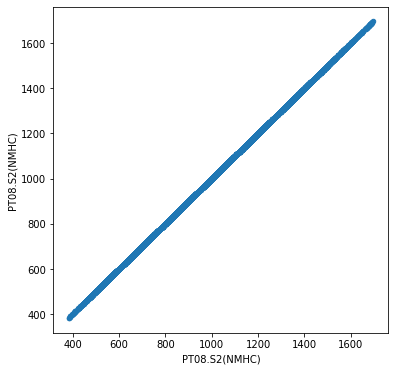

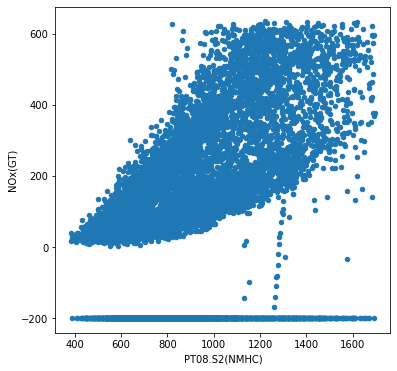

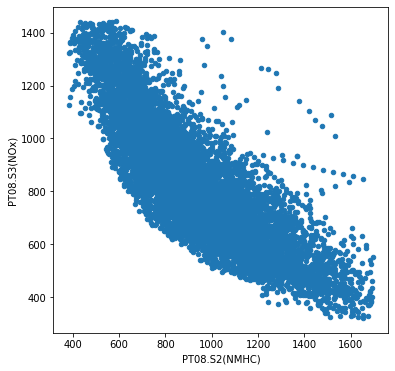

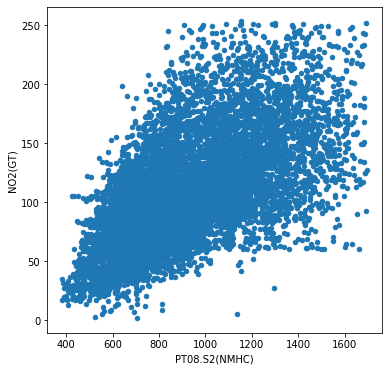

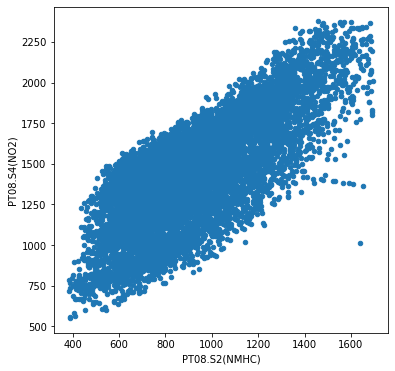

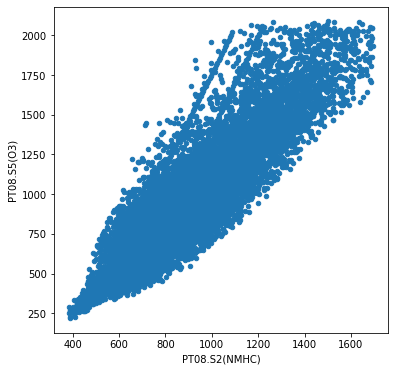

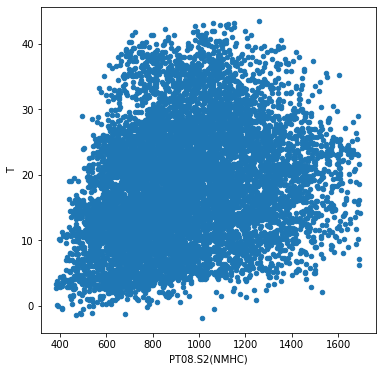

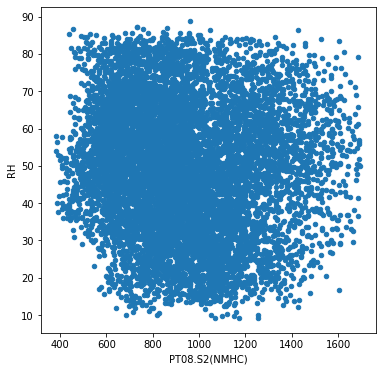

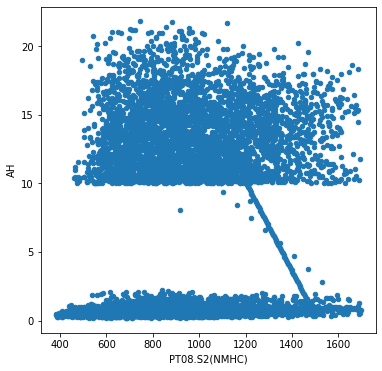

In [35]:
for i in columns_names[2:]:
  new_dataset.plot(kind='scatter',x =columns_names[5],y=i,figsize=(6,6))

Con base en las gráficas se utilizaron las columnas  
*   PT08.S1(CO)
*   C6H6(GT) 
*   PT08.S5(O3)

### Dispersión para modelo B

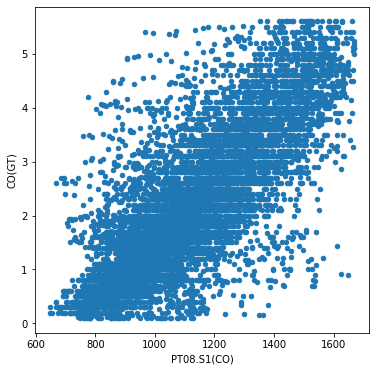

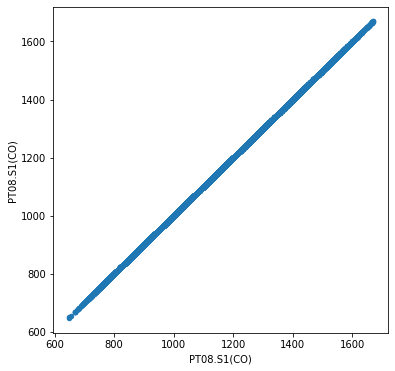

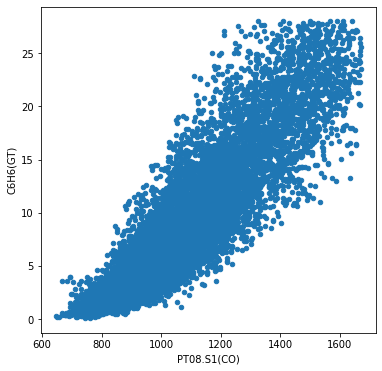

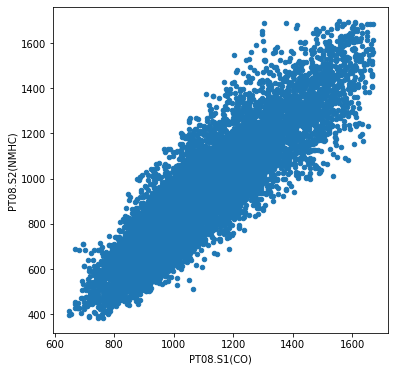

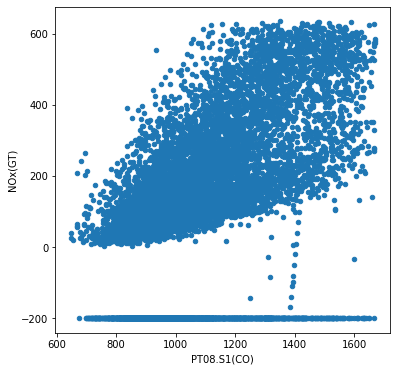

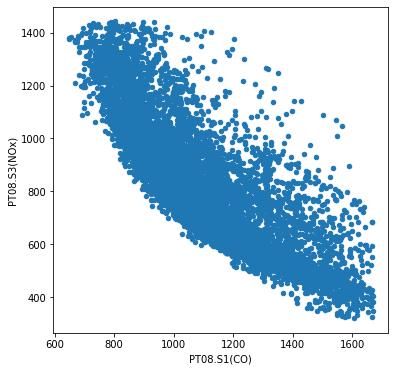

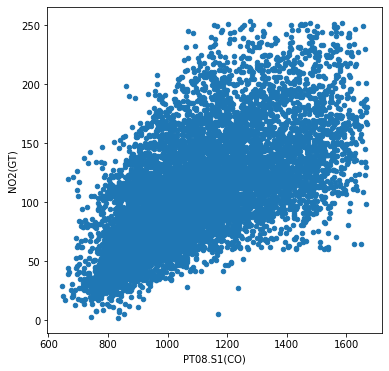

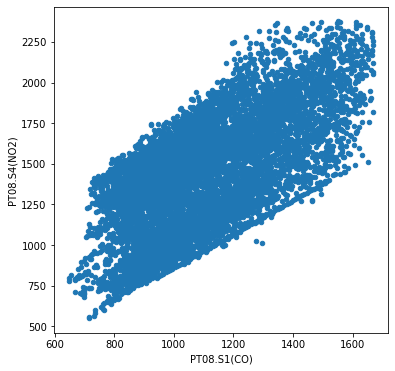

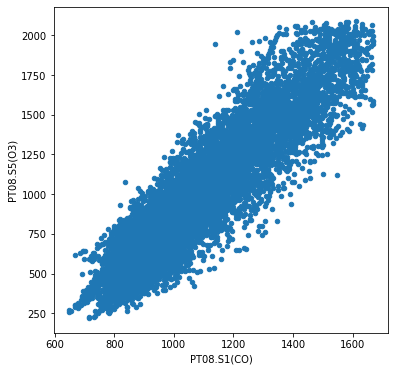

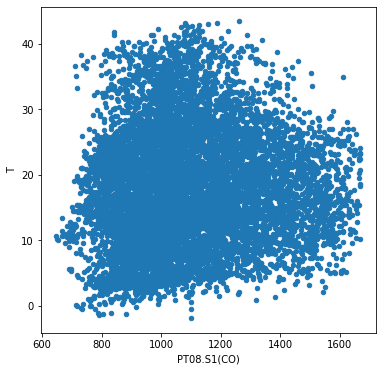

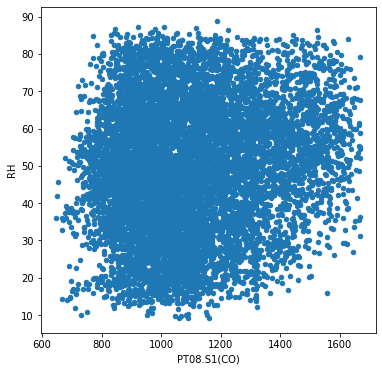

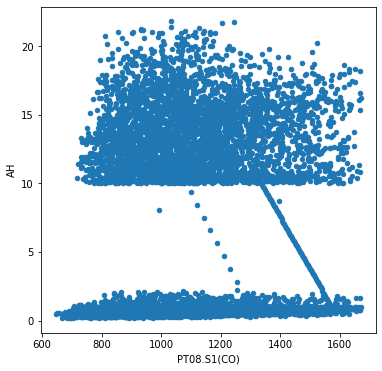

In [36]:
for i in columns_names[2:]:
  new_dataset.plot(kind='scatter',x =columns_names[3],y=i,figsize=(6,6))

Con base en las gráficas se utilizaron las columnas  
*   C6H6(GT) 
*   PT08.S2(NMHC) 
*   PT08.S3(NOx) 
*   PT08.S5(O3)

### Dispersión para modelo C

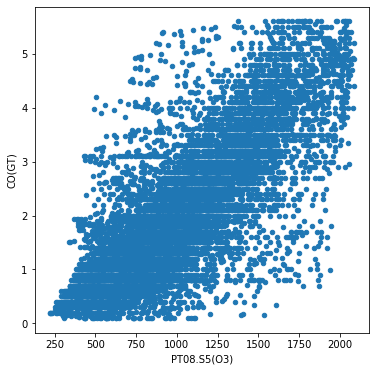

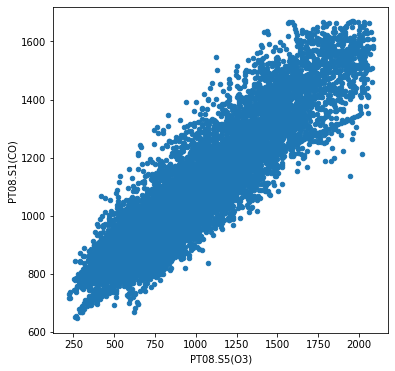

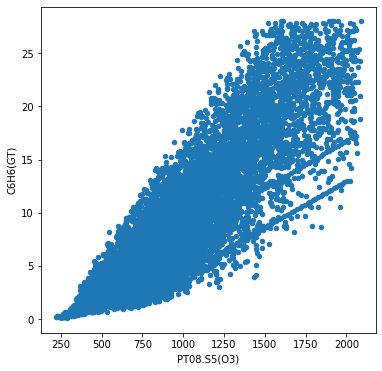

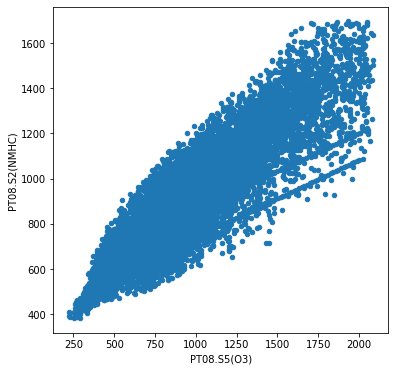

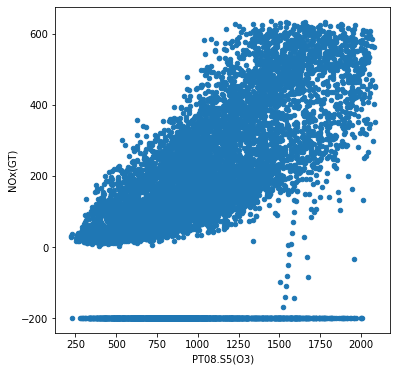

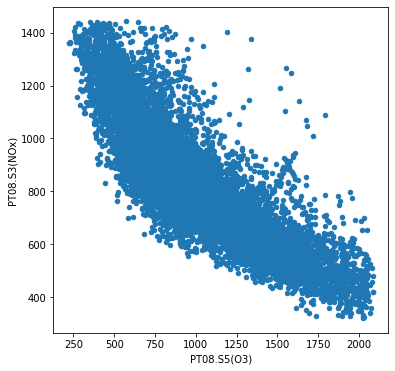

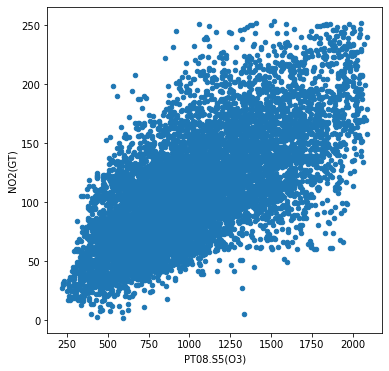

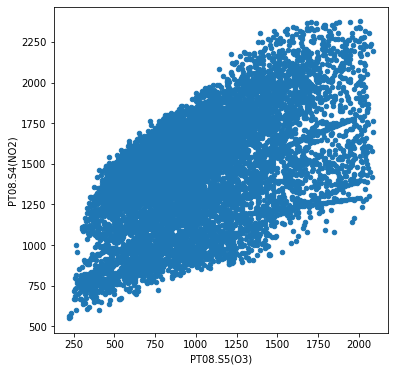

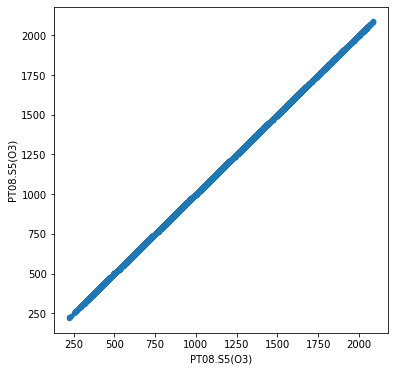

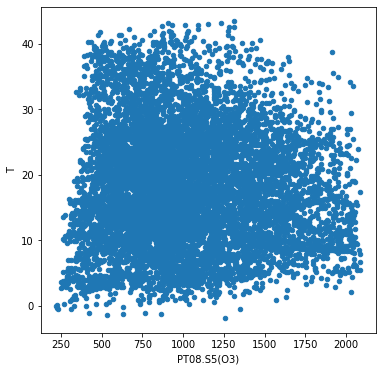

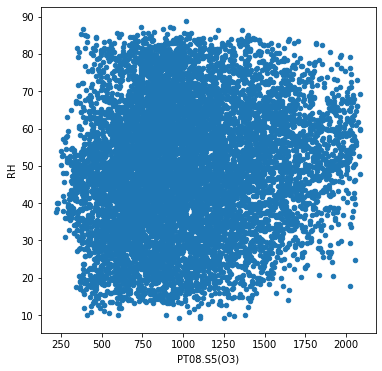

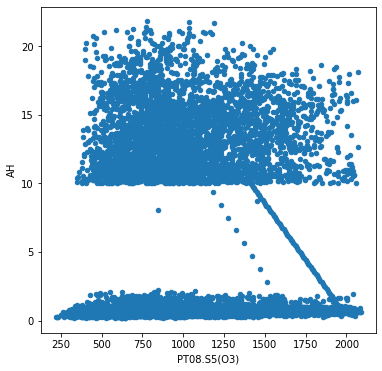

In [37]:
for i in columns_names[2:]:
  new_dataset.plot(kind='scatter',x =columns_names[10],y=i,figsize=(6,6))

Con base en las gráficas se utilizaron las columnas


*   PT08.S1(CO) 
*   PT08.S2(NMHC)  
*   NOx(GT)  
*   PT08.S3(NOx)  
*   PT08.S4(NO2)  
*   T  
*   RH  
*   AH

